In [1]:
import nltk
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download("networds")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading networds: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

# 1. Data Preprocessing

### 1. Removing HTML tags, special characters, and extra spaces

### 2. Remove stopwords and convert text to lowercase


In [8]:
stop_words=set(stopwords.words("english"))
stemmer=PorterStemmer()

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = BeautifulSoup(text, "lxml").get_text()
    text=re.sub(r"[^a-zA-Z\s]", "",text)
    text=re.sub((r"^\s+|\s+|$"), " ",text)
    text=re.sub(r"@[\w\d]+", " ",text)
    text=re.sub(r"http:[\w:/\.]+", " ",text)
    text=text.lower()
    text=" ".join(text.split())
    words=[stemmer.stem(word) for word in text.split() if word not in stop_words]
    return " ".join(words)
cleaned_df=df.copy()
cleaned_df["review"]=cleaned_df["review"].astype(str).apply(preprocess)
# cleaned_df["sentiment"] =cleaned_df["sentiment"].astype(str).apply(preprocess)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9248\3725798864.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").get_text()


In [9]:
cleaned_df.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


# 2. Exploratory Data Analysis (EDA)

### 1. Sentiments Distribution

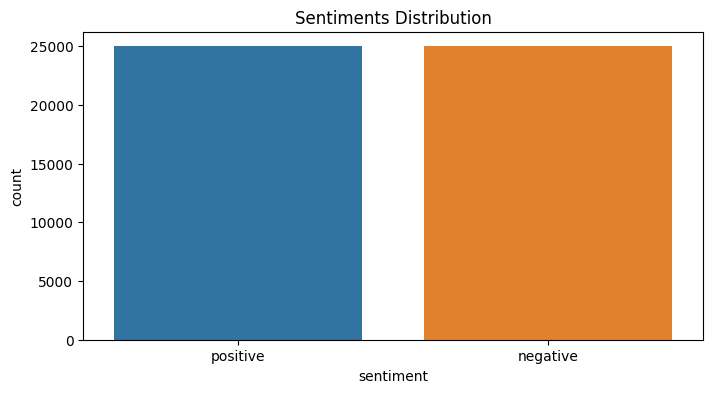

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data= cleaned_df, x="sentiment", hue="sentiment")
plt.title("Sentiments Distribution")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()

## **Positive vs Negative Reviews**

## Most Frequent words

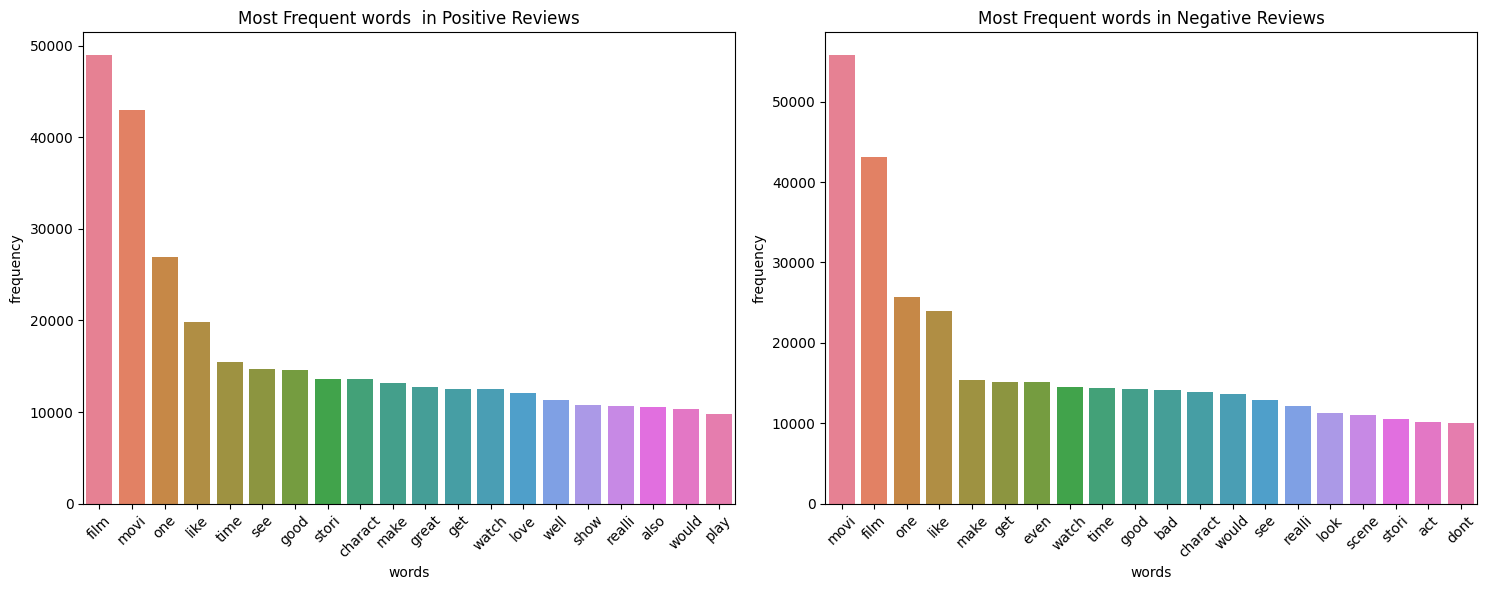

In [11]:
pos_reviews=" ".join(cleaned_df[cleaned_df["sentiment"]=="positive"]["review"]).split()
neg_reviews=" ".join(cleaned_df[cleaned_df["sentiment"]=="negative"]["review"]).split()

freq_pos= Counter(pos_reviews)
freq_neg= Counter(neg_reviews)

common_words_pos=freq_pos.most_common(20)
common_words_neg=freq_neg.most_common(20)

common_df_pos=pd.DataFrame(common_words_pos, columns=["words","frequency"])
common_df_neg=pd.DataFrame(common_words_neg, columns=["words","frequency"])

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x="words",y="frequency", data=common_df_pos,hue="words",legend=False)
plt.xticks(rotation=45)
plt.title("Most Frequent words  in Positive Reviews")

plt.subplot(1,2,2)
sns.barplot(x="words", y="frequency", data= common_df_neg, legend=False, hue="words")
plt.xticks(rotation=45)
plt.title("Most Frequent words in Negative Reviews")

plt.tight_layout()
plt.show()

## Word Cloud

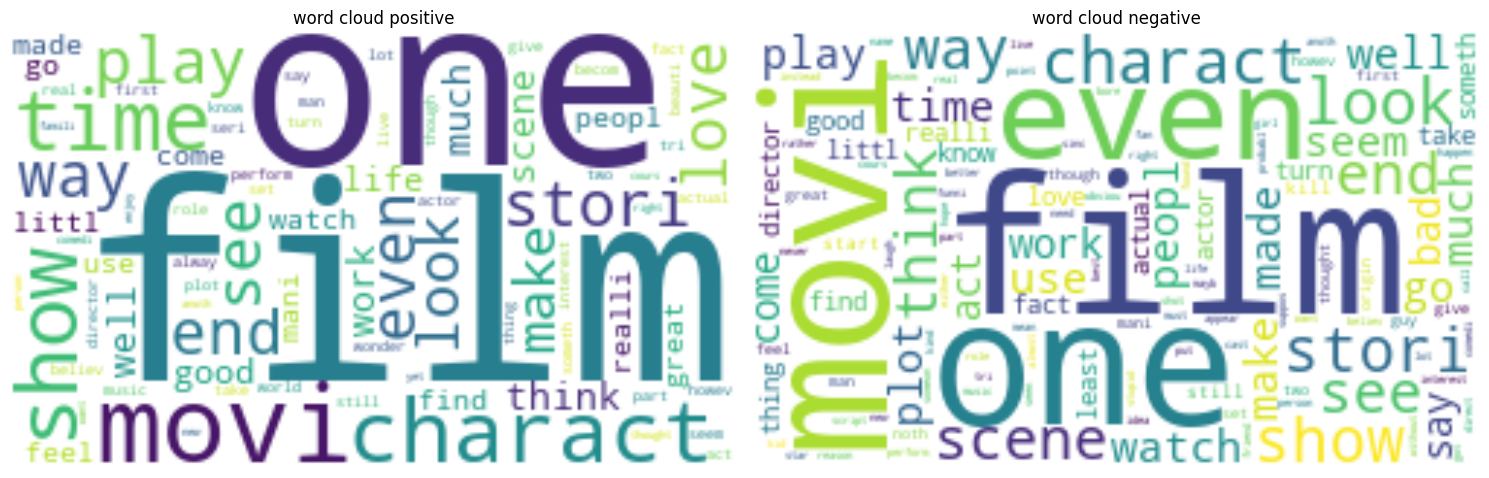

In [12]:
unique_sentiments=cleaned_df["sentiment"].unique()
n_sentiments=len(unique_sentiments)

plt.figure(figsize=(15,5))
for i,sentiment in enumerate(unique_sentiments):
  plt.subplot(1,n_sentiments,i+1)
  word_text=" ".join(cleaned_df[cleaned_df["sentiment"]==sentiment]["review"])
  wordcloud_text=WordCloud(width=250, height=150, background_color="white").generate(word_text)
  plt.imshow(wordcloud_text, interpolation="bilinear")
  plt.axis("off")
  plt.title(f"word cloud {sentiment}")
plt.tight_layout()
plt.show()

## Text Length Distribution

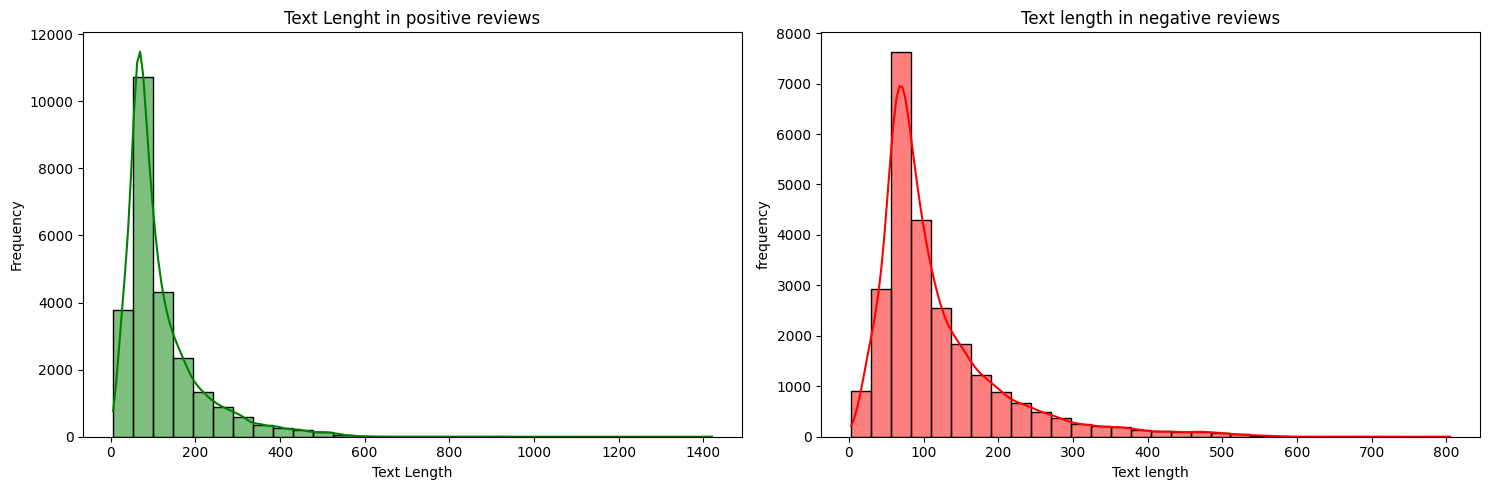

In [13]:
cleaned_df["text_length"] = cleaned_df["review"].apply(lambda x:len(x.split()))

pos_reviews_len=cleaned_df[cleaned_df["sentiment"]=="positive"]["text_length"]
neg_reviews_len=cleaned_df[cleaned_df["sentiment"]=="negative"]["text_length"]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(pos_reviews_len, bins=30, kde=True, color="green")
plt.title("Text Lenght in positive reviews")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(neg_reviews_len, bins=30, kde=True, color="red")
plt.title("Text length in negative reviews")
plt.xlabel("Text length")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

# 3. Feature Engineering


### 1. Bag of Words

In [ ]:
# bow_vectorizer=CountVectorizer()
# bow_features=bow_vectorizer.fit_transform(cleaned_df["review"])

### 2. TF-IDF

In [14]:
tfidf = TfidfVectorizer(max_features=5000)  # limit features for speed
x = tfidf.fit_transform(cleaned_df["review"])

### Label Encodding

In [15]:
label_encoder=LabelEncoder()
cleaned_df["sentiment"]= label_encoder.fit_transform(cleaned_df["sentiment"])
y=cleaned_df["sentiment"]

In [18]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

### Splitting data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("training data shape",x_train.shape)
print("testing data shape",x_test.shape)

training data shape (40000, 5000)
testing data shape (10000, 5000)


### Model Training

In [21]:
nb_model=MultinomialNB()
nb_model.fit(x_train, y_train)
nb_pred=nb_model.predict(x_test)

In [24]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred=rf_model.predict(x_test)

### Model Evaluation

In [26]:
def evaluate_model(model_name,y_test,y_pred):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy Score",accuracy_score(y_test,y_pred))
    print("Classificatiio Report:\n",classification_report(y_test,y_pred))
    print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
    print()
evaluate_model("Naive Bayes",y_test,nb_pred)
evaluate_model("Logistic regression",y_test,lr_pred)
evaluate_model("Random forest",y_test,rf_pred)



🔹 Model: Naive Bayes
Accuracy Score 0.8447
Classificatiio Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

confusion matrix:
 [[4154  807]
 [ 746 4293]]


🔹 Model: Logistic regression
Accuracy Score 0.8833
Classificatiio Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

confusion matrix:
 [[4301  660]
 [ 507 4532]]


🔹 Model: Random forest
Accuracy Score 0.8451
Classificatiio Report:
               precision    recall  f1-

### Saving data vectors

In [28]:
import pickle
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)
print("vectorizer saved successfully")

vectorizer saved successfully


### Saving the model

In [29]:
with open("movie_reviews.pkl","wb") as file:
    pickle.dump(lr_model,file)
print("model saved successfully")

model saved successfully
